## **Getining familiar with the data.**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px



## **importing the newest data from drive**

In [2]:
from google.colab import drive
drive.mount('path')
import pandas as pd
df_clean=pd.read_csv('path')


Mounted at /content/drive


In [3]:
df_clean.head()

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Banking Services
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit Card related Services
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,Credit Card related Services
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,Credit Card related Services
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,Banking Services


In [4]:
df_clean.shape

(21066, 5)

In [5]:
df_clean.head()

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Banking Services
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit Card related Services
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,Credit Card related Services
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,Credit Card related Services
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,Banking Services


### finding the frequence of complaint's lenght

In [ ]:
!pip install wordcloud


### **Find the top 100 frequent words**

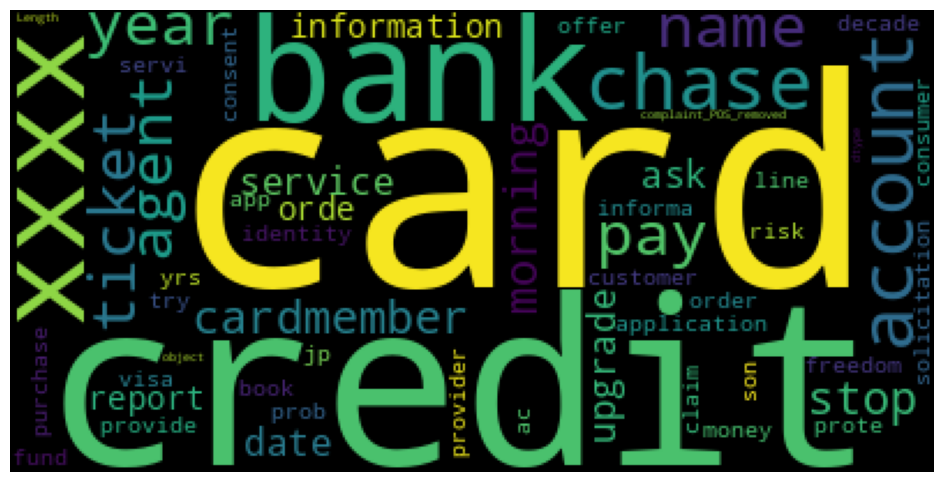

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(str(df_clean.complaint_POS_removed))
print(wordcloud)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
print(list(wordcloud.words_.keys())[:100])

['card', 'credit', 'bank', 'xxxx', 'chase', 'account', 'name', 'agent', 'ticket', 'pay', 'year', 'morning', 'stop', 'cardmember', 'service', 'ask', 'upgrade', 'date', 'information', 'orde', 'report', 'application', 'identity', 'consent', 'servi', 'try', 'book', 'offer', 'informa', 'son', 'fund', 'money', 'customer', 'decade', 'solicitation', 'visa', 'provider', 'claim', 'purchase', 'prote', 'risk', 'provide', 'consumer', 'app', 'yrs', 'freedom', 'prob', 'jp', 'order', 'line', 'ac', 'complaint_POS_removed', 'Length', 'dtype', 'object']


### **Visualize the lenght of complaints and their frequences**

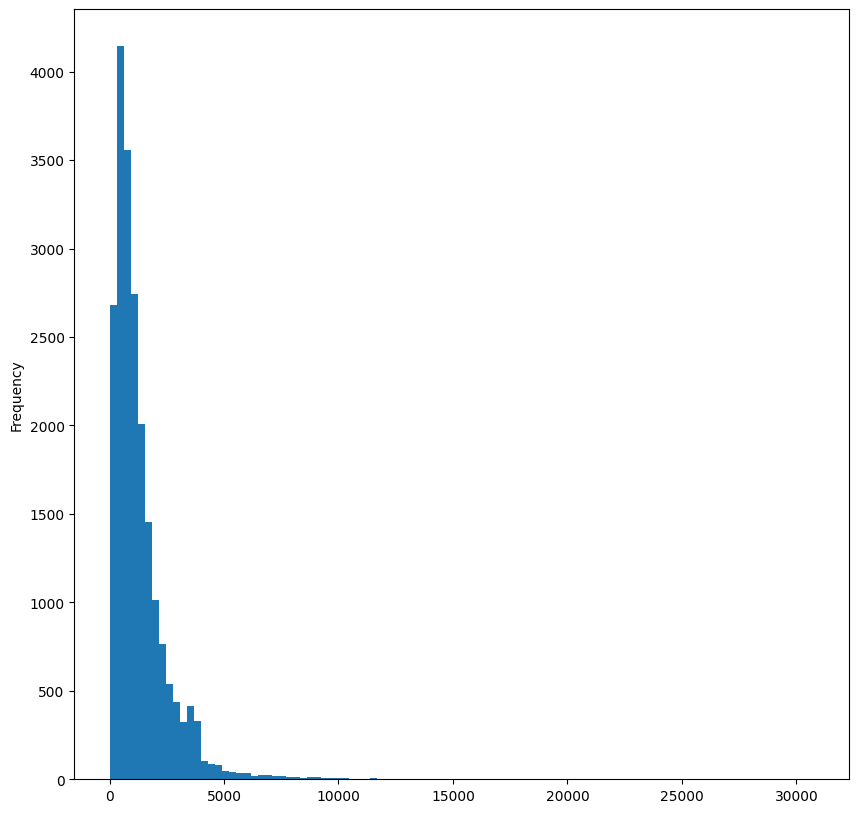

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("Length of Complaint")
plt.ylabel("Frequency of Length")

df_clean['complaint'].str.len().plot(
    kind='hist',
    bins=100,
    figsize=(10,10)
)
plt.show()


#### Removing -PRON- from the text corpus

This type of operation is often used when processing text data, especially after performing part-of-speech (POS) tagging where '-PRON-' might be a placeholder for pronouns that you wish to remove for further analysis

In [ ]:
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

In [ ]:
df_clean.head()

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Banking Services
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit Card related Services
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,Credit Card related Services
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book xxxx ticket offer ticket card informa...,Credit Card related Services
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,Banking Services


**For a better understanding let's find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.**


1. unigram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

def get_top_n_words(corpus, n=None):
  vec=CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True )
  return words_freq[:n]

common_words = get_top_n_words(df_clean['Complaint_clean'].values.astype('U'),30)
df_unigram = pd.DataFrame(common_words,columns=['unigram', 'count'])

fig = go.Figure([go.Bar(x=df_unigram['unigram'], y=df_unigram['count'])])
fig.update_layout(title=go.layout.Title(text='Top 30 unigrams in the cleaned complaint text'))
fig.show()


2. bigrams

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec=CountVectorizer(stop_words='english',ngram_range=(2, 2)).fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True )
    return words_freq[:n]

common_words = get_top_n_bigram(df_clean['Complaint_clean'].values.astype('U'),30)
df_bigram = pd.DataFrame(common_words,columns=['bigram', 'count'])

fig = go.Figure([go.Bar(x=df_bigram['bigram'], y=df_bigram['count'])])
fig.update_layout(title=go.layout.Title(text='Top 30 bigram in the cleaned complaint text'))
fig.show()

3. trigrams

In [ ]:
def get_top_n_trigram(corpus,n=None):
  vec=CountVectorizer(stop_words='english',ngram_range=(3, 3)).fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq, key= lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words=get_top_n_trigram(df_clean['Complaint_clean'].values.astype('U'), 30)
df_trigram=pd.DataFrame(common_words, columns=['trigram', 'count'])

fig=go.Figure([go.Bar(x=df_trigram['trigram'], y=df_trigram['count'])])
fig.update_layout(title=go.layout.Title(text='Top 30 trigram in the cleaned complaint text'))
fig.show()

since the personal details of customer has been masked in the dataset with xxxx then it will have no use for our work so let us remove it

In [ ]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [ ]:
df_clean.head()


,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Banking Services
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit Card related Services
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,Credit Card related Services
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,Credit Card related Services
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,Banking Services


A TF-IDF matrix represents the importance of words in a set of documents:

- Rows: Each row is a document.
- Columns: Each column is a unique word (term) across all documents.
- Values: Each cell shows the TF-IDF score for a word in a document. Higher scores mean the word is more important (frequent in the document but rare across other documents).

feature extraction:
to achieve that i'll use the following things:
- max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"
- min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"
- TfidfVectorizer is a tool in Python's scikit-learn library used to convert a collection of raw text documents into a matrix of TF-IDF features. It combines two key steps:
    - Tokenization and Vectorization: Breaks down text into individual terms (words) and converts them into a vector of term frequencies.
    - TF-IDF Weighting: Applies the TF-IDF algorithm to weigh the importance of terms in each document, reducing the impact of commonly used words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95)

Creating a document term matrix using fit_transform which has tuples of (complaint_id,token_id) tf-idf score as contents: The tuples that are not there have a tf-idf score of 0

X: The result is a sparse matrix where each row represents a document, and each column represents a word. The values in the matrix are the TF-IDF scores.

In [ ]:
# Fit and transform the data
X = vect.fit_transform(df_clean['Complaint_clean'])

# Convert the matrix to a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

# Display the DataFrame
print(X[[0,1]])
print(tfidf_df.head())


  (0, 3112)	0.17188400797135167
  (0, 141)	0.25708319218716946
  (0, 6563)	0.19710038800920066
  (0, 51)	0.07897047894634403
  (0, 1072)	0.07077319596150661
  (0, 1465)	0.17722997370928437
  (0, 3428)	0.1267168003569617
  (0, 5688)	0.20751319670092955
  (0, 4258)	0.1267898166140693
  (0, 3957)	0.16959464319097886
  (0, 6243)	0.15619026665731717
  (0, 6973)	0.251592659558765
  (0, 1774)	0.5491090245867117
  (0, 399)	0.1949199227938354
  (0, 5932)	0.13367850493632594
  (0, 932)	0.31576631703424995
  (0, 557)	0.17973179800258507
  (0, 6286)	0.29774744109910245
  (0, 4273)	0.23056215297000862
  (1, 5377)	0.31988225228593614
  (1, 1436)	0.274815136149022
  (1, 1046)	0.21345149612006514
  (1, 4549)	0.183273594089867
  (1, 1734)	0.3006310732884272
  (1, 6894)	0.3913344058113761
  (1, 193)	0.6814131663171233
  (1, 926)	0.10084678830202894
  (1, 51)	0.08360276916707333
  (1, 3428)	0.13414981840278725
    aa  aarp  abandon  abandonment  abatement  abbreviation  abd  abide  \
0  0.0   0.0      0.

In [ ]:
df_clean

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Banking Services
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit Card related Services
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,Credit Card related Services
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,Credit Card related Services
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,Banking Services
...,...,...,...,...,...
21061,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...,Credit Card related Services
21062,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...,Fraud and Dispute
21063,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...,pay risk provide consumer bank app chase year ...,Fraud and Dispute
21064,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem ...,Others


In [ ]:
file_path = 'path'
df_clean.to_csv(file_path, index=False)
print(f"file is saved in {file_path}")

file is saved in /content/drive/My Drive/itil-ticket-classifier-data/df_clean_backup.csv


## **Topic Modelling using NMF**

In [ ]:
from sklearn.decomposition import NMF
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40, max_iter = 500)
W = nmf_model.fit_transform(X)  # Document-topic matrix
H = nmf_model.components_       # Topic-term matrix
#Print the Top 15 words for each of the topics
words = np.array(vect.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words
print(topic_words)

          Word 1    Word 2  Word 3        Word 4     Word 5    Word 6  \
Topic 1  account      bank   check         money       fund     chase   
Topic 2   credit      card  report       inquiry      chase   account   
Topic 3  payment   balance   month           fee  statement       day   
Topic 4   charge      card     fee   transaction    dispute     chase   
Topic 5     loan  mortgage    home  modification      chase  property   

           Word 7   Word 8 Word 9      Word 10   Word 11      Word 12  \
Topic 1   deposit   branch    day       number  business  transaction   
Topic 2     score  company  limit  information      debt  application   
Topic 3      time     auto   date          pay    credit      account   
Topic 4  merchant    fraud  claim     purchase   service         time   
Topic 5      year   letter   rate         time  document         bank   

           Word 13      Word 14   Word 15  
Topic 1      claim     transfer  customer  
Topic 2     letter         year   

In [ ]:
#Create the df topics where each row represnts a doc and column represents a topic value and the value represent the relationship between them
df_topics = pd.DataFrame(W, columns=[i for i in range(num_topics)])
df_topics.head(5)


,0,1,2,3,4
0,0.021999,0.013027,0.006672,0.007553,0.021965
1,0.008842,0.014607,0.002214,0.012038,0.006043
2,0.000000,0.061476,0.000000,0.000000,0.000000
3,0.017940,0.063981,0.000000,0.005089,0.020491
4,0.070711,0.000000,0.000000,0.002552,0.007611


In [ ]:
df_topics['Topic'] = df_topics.apply(lambda x: x.idxmax(), axis=1)
df_topics.head(5)

,0,1,2,3,4,Topic
0,0.021999,0.013027,0.006672,0.007553,0.021965,0
1,0.008842,0.014607,0.002214,0.012038,0.006043,1
2,0.000000,0.061476,0.000000,0.000000,0.000000,1
3,0.017940,0.063981,0.000000,0.005089,0.020491,1
4,0.070711,0.000000,0.000000,0.002552,0.007611,0


In [ ]:
#Assign the best topic to each of the complaint in Topic Column
df_clean['Topic'] = df_topics['Topic']
df_clean.head()

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,1
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,1
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0


In [ ]:
#Print the first 5 Complaint for each of the Topics
df_clean_grouped = df_clean.groupby('Topic').head(5)
df_clean_grouped.sort_values('Topic')

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0
6,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday thursday b...,0
10,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and xxxx,mishandle account auto xxxx,mishandle account auto,0
12,i opened an account with chase bank on xxxx an...,I open an account with chase bank on xxxx and ...,account bank code bonus term everything accoun...,account bank code bonus term everything accoun...,0
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,1
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,1
5,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,1
9,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,chase credit card datum credit report company ...,chase credit card datum credit report company ...,1


In [ ]:
df_clean.head()

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,1
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,1
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0


In [ ]:
#Create the dictionary of Topic names and Topics
Topic_names = {0:'Banking Services', 1:'Credit Card related Services',
               2:'Others', 3:'Fraud and Dispute', 4:'Mortgage and Loan Services'}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)


In [ ]:
df_clean.head()

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Banking Services
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit Card related Services
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,Credit Card related Services
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,Credit Card related Services
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,Banking Services


In [ ]:
file_path = 'path'
df_clean.to_csv(file_path, index=False)
print(f"file is saved in {file_path}")

file is saved in /content/drive/My Drive/itil-ticket-classifier-data/df_clean_backup.csv


In [ ]:
print(df_clean[df_clean["Topic"] == "Credit Card related Services"]["complaint"].iloc[4])

i have a chase credit card which is incorrectly reporting data on my credit report the company is not helping resolve the issue


## **Supervised model to predict any new complaints to the relevant Topics**

In [ ]:
#Create the dictionary again of Topic names and Topics
Topic_names = {"Banking Services":0,"Credit Card related Services":1,"Others":2,"Fraud and Dispute":3,"Mortgage and Loan Services":4}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [ ]:
df_clean.head()

,complaint,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
1,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
2,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,1
3,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,1
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0


In [ ]:
df_clean.shape


(21066, 5)

In [ ]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[["complaint","Topic"]]
training_data.head()


,complaint,Topic
0,good morning my name is xxxx xxxx and i apprec...,0
1,i upgraded my xxxx xxxx card in and was told ...,1
2,chase card was reported on however fraudulent...,1
3,on while trying to book a xxxx xxxx ticket ...,1
4,my grand son give me check for i deposit it i...,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data['complaint'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_train_tfidf,training_data.Topic,test_size=0.25,random_state=40)
print('X_Train',X_train.shape)
print('y_train',y_train.shape)
print('X_Test',X_test.shape)
print('y_test',y_test.shape)

X_Train (15799, 33598)
y_train (15799,)
X_Test (5267, 33598)
y_test (5267,)


In [ ]:
# Creating a dataframe to store all models result
result_df = pd.DataFrame({"Original Value":y_test})

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=40)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(multi_class='multinomial', random_state=40)

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)
clf_report = classification_report(y_test,y_pred)
print(F'ACC on train : {accuracy_score(y_train,y_pred_train)}')
print(F'ACC on test : {accuracy_score(y_test,y_pred)}')
print(clf_report)

ACC on train : 0.9700613962909045
ACC on test : 0.9274729447503323
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1304
           1       0.92      0.95      0.93      1207
           2       0.96      0.85      0.90       579
           3       0.92      0.91      0.91      1232
           4       0.94      0.93      0.94       945

    accuracy                           0.93      5267
   macro avg       0.93      0.92      0.92      5267
weighted avg       0.93      0.93      0.93      5267

